## Использование моделей линейной и логистической регрессии на практике. Прогноз удоя коров, а так же вкуса молока на основе данных хозяйства "ЭкоФерма".

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Никита! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

### Данный блокнот прогнозирует количественные и качественные признаки, на основе некоторых исторических данных, представленных заказчиком. Прогнозируемые признаки включают в себя: Удой кг, Вкус молока (вкусное/ не вкусное). Основным параметром бизнеса для результатов прогноза является пороговое значение удоя коров (не менее 6000 кг в год), а так же вкус молока (вкусное). Основывается проект на исторических данных клиента - параметрах его текущего хозяйства. Прогноз строится на основе признаков потенциальных коров к покупке. 

### Для выполнения заказа в данной работе: 
1. Были изучены вводные данные, а так же данные потенциальных коров к покупке.
2. Были обработаны данные на момент наличия пропусков и дубликатов в данных.
3. Был произведен исследовательский и статистический анализ данных.
4. Была произведена проверка данных на момент наличия корреляции между признаками для будущей работы с ними.
5. Была построена модель линейной регрессии с начальными данными и был произведен анализ метрик данной модели.
6. Модель была доработана: добавлены новые признаки, а так же удалены нелинейные зависимости между признакми. Метрики итоговой модели также были проанализированы. Конечная модель была использована для прогноза на интересующих клиента данных. Прогноз был получен.
7. Была построена модель логистической регрессии. Ее результаты, в виде метрик, также были проанализированы.
8. Исходя из ТЗ заказчика, порог принадлежности к классам был изменен с стандартного 0.5 до 0.8. 
9. Конечная модель (с измененным порогом) была использована для прогноза вкуса молока. Прогноз был получен.
10. Исходя из ТЗ, данные были отфильтрованы. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.preprocessing import OneHotEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Совет 🤔:

Смотри что ещё можно сделать согласно PEP-8.  Вместо
    

    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import StratifiedKFold
    from sklearn.model_selection import GridSearchCV
    

Пишем в одну строку через запятую    

    
    from sklearn.model_selection import cross_val_score,  train_test_split, ...
    
    

Если запись получается слишком длинной, это тоже противоречит PEP8, тогда скобочки:

	from sklearn.metrics import (
	   accuracy_score, 
 	   confusion_matrix, 
	   r2_score,
 	   precision_score,
 	   recall_score
	)


По аналогии можешь исправить  





<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет:



- есть рекомендации PEP-8 при написании кода, в том числе и для импортов. Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html). Есть что поправить 



## Загрузка данных

In [2]:
df_main = pd.read_csv('/datasets/ferma_main.csv', sep = ';', decimal = ',')
df_dad = pd.read_csv('/datasets/ferma_dad.csv', sep = ';', decimal = ',')
df_cow = pd.read_csv('/datasets/cow_buy.csv', sep = ';', decimal = ',')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍




</div>





<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

    
Ошибка:    
    

- Не забываем указать decimal. Сразу после чтения файла, убеждаемся что данные прочитаны верно, если нет, сразу вносим корректировки в чтение, иначе у нас неопределён верный тип данных, и многие методы и функции корректно не отработают
    


<div class="alert alert-warning">



Совет 🤔:
    
    
- Ещё есть такой интересный аргумент при чтении как  parse_dates - позволяет указать какие столбцы в DataFrame содержат даты и время. Как раз для этого проекта. Если у нас установлен верный тип данных, это значит что мы можем легко вытасиквать информацию о годе, месяце, дня, времени, можем вычитать, прибавлять из столбца с датами другой столбец с датами, получая осмысленную информацию


In [3]:
print(df_main.info())
print(df_dad.info())
print(df_cow.info())
df_main.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


Судя по предварительной проверке данных, пропусков в данных нет.
Тем не менее, названия столбцов следует изменить. 
Исходя из полученной информации, имеем:
1. Датафрейм df_main содержит в себе столбцы с числовыми данными, вещественными, которые имеют тип данных object. В будущем нужно проработать типы данных.
2. Датафрейм df_dad Содержит имена отцов скота. Даже в пяти первых строках встречаются повторы. Подозреваю, что у скота могут быть одинаковые имена. Надо лишь проверить id на предмет повтора.
3. Аналогично первому датафрейму, столбцы с вещественными данными обладают типом object

In [4]:
display(df_main)
display(df_dad)
(df_cow)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
629,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
...,...,...
624,625,Буйный
625,626,Барин
626,627,Барин
627,628,Барин


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:

print не всегда нужен, вывод часто произойдет и так, а когда нужен, вместо print лучше использовать display, будет красивей





</div>

##  Предобработка данных

In [5]:
df_main.rename(columns = {'Удой, кг':'udoi',
               'ЭКЕ (Энергетическая кормовая единица)':'eke',
              'Сырой протеин, г':'raw_protein',
              'СПО (Сахаро-протеиновое соотношение)':'spo',
              'Порода':'breed',
              'Тип пастбища':'pasture',
              'порода папы_быка':'father_breed',
              'Жирность,%':'fat_content',
              'Белок,%':'protein',
              'Вкус молока':'milk_taste',
              'Возраст':'age'}, inplace = True)
df_dad.rename(columns = {'Имя Папы':'father_name'}, inplace = True)
df_cow.rename(columns = {'Порода':'breed',
                         'Тип пастбища':'pasture',
              'Имя_папы':'father_name',
              'порода папы_быка':'father_breed',
             'Текущая_жирность,%':'current_fat_content',
             'Текущий_уровень_белок,%':'current_protein',
             'Возраст':'age'}, inplace = True)




<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

👍 помнишь о стилистике


Молодец что используешь rename,  чтобы не думать о порядке. 

    
    
 <div class="alert alert-warning">


Совет: 



- можно было автоматизировать процесс воспользовавшись  .lower, а с помощью регуляризации    (или .rename) избавиться от точек, % итп, а если надо организовать нижние подчёркивание (привезти название столбцов к змеиному коду). Пример регулярного выражения:  
     
	df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in df.columns]
     





Имена столбцов были успешно изменены. 

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:

Это уже будет не нужно


#### Добавил decimal и удалил замену разделителя.

In [6]:
df_main['pasture'] = df_main['pasture'].str.replace('Равнинное', 'Равнинные')
df_main['pasture'].unique()
df_main['father_breed'] = df_main['father_breed'].str.replace('Айдиалл', 'Айдиал')
df_main['father_breed'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

    
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех:


    
- Здорово что обращено внимание на  скрытые дубликаты    
    


In [7]:
df_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           629 non-null    int64 
 1   father_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


Работа с данным df не нужна.

Типы данных во всех датафреймах были успешно изменены на нужные нам для дальнейшей работы.

In [8]:
print(df_main['id'].duplicated().sum())
df_dad['id'].duplicated().sum()

5


0

Справедливо производить проверку дубликатов лишь среди столбцов с уникальными значениями. А именно, столбцы id в дф df_main и df_dad.

Количество повторов(df_main):
id - 5

Количество повторов(df_dad):
id - 0

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



На сколько помню никаких явных дубликатов в df_main не было 


#### Вполне вероятно, пока пытался оклематься от новогодних, сам их и надублировал строками, потом и удалял. Но факт их наличия подтвержден запуском кода.

In [9]:
print(df_main[df_main['id'].duplicated()])

      id  udoi   eke  raw_protein   spo            breed    pasture  \
629  627  5970  14.4         1837  0.88  РефлешнСоверинг  Холмистое   
630  627  5970  14.4         1837  0.88  РефлешнСоверинг  Холмистое   
631  627  5970  14.4         1837  0.88  РефлешнСоверинг  Холмистое   
632  627  5970  14.4         1837  0.88  РефлешнСоверинг  Холмистое   
633  627  5970  14.4         1837  0.88  РефлешнСоверинг  Холмистое   

    father_breed  fat_content  protein milk_taste          age  
629      Соверин         3.64    3.075  не вкусно  более_2_лет  
630      Соверин         3.64    3.075  не вкусно  более_2_лет  
631      Соверин         3.64    3.075  не вкусно  более_2_лет  
632      Соверин         3.64    3.075  не вкусно  более_2_лет  
633      Соверин         3.64    3.075  не вкусно  более_2_лет  


Заметим, что дубликатом является корова под номером 627.

In [10]:
df_main = df_main.drop_duplicates(subset = 'id')
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            629 non-null    int64  
 1   udoi          629 non-null    int64  
 2   eke           629 non-null    float64
 3   raw_protein   629 non-null    int64  
 4   spo           629 non-null    float64
 5   breed         629 non-null    object 
 6   pasture       629 non-null    object 
 7   father_breed  629 non-null    object 
 8   fat_content   629 non-null    float64
 9   protein       629 non-null    float64
 10  milk_taste    629 non-null    object 
 11  age           629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB


Теперь количество строк датафреймов main и cow совпадает. 

In [11]:
column = [column for column in df_main]
for i in column:
    print(i, ':', df_main[i].isna().sum())


id : 0
udoi : 0
eke : 0
raw_protein : 0
spo : 0
breed : 0
pasture : 0
father_breed : 0
fat_content : 0
protein : 0
milk_taste : 0
age : 0


In [12]:
column = [column for column in df_dad]
for i in column:
    print(i, ':', df_dad[i].isna().sum())


id : 0
father_name : 0


In [13]:
column = [column for column in df_cow]
for i in column:
    print(i, ':', df_cow[i].isna().sum())


breed : 0
pasture : 0
father_breed : 0
father_name : 0
current_fat_content : 0
current_protein : 0
age : 0


Пропусков не обнаружено.

## Исследовательский анализ данных

In [14]:
df_main.describe()

,id,udoi,eke,raw_protein,spo,fat_content,protein
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


Описательная статистика датафрейма df_main выглядит неплохо, за исключением столбца udoi, где максимальное значение явно является выбросом. Построим ящик для подтверждения гипотезы.

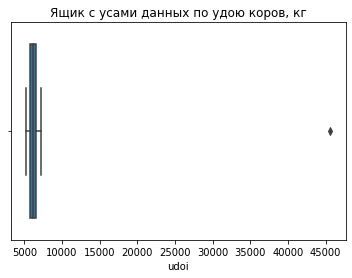

In [15]:
sns.boxplot(x = df_main['udoi'])
plt.title('Ящик с усами данных по удою коров, кг')
plt.show()

Вот и выброс на отметке 45 000 кг молока. Посмотрим на ящик без этого выброса.

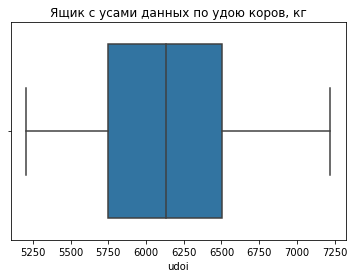

In [16]:
df_main2 = df_main.query('udoi < 10000')
sns.boxplot(x = df_main2['udoi'])
plt.title('Ящик с усами данных по удою коров, кг')
plt.show()

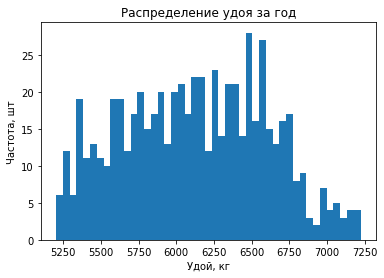

In [17]:
df_main2['udoi'].plot(kind = 'hist', bins = 45)
plt.title('Распределение удоя за год')
plt.xlabel('Удой, кг')
plt.ylabel('Частота, шт')
plt.show()

Данные лежат в промежутке 5250 - 7250 кг молока в год.  

In [18]:
def def_column_quantity(df):
    column_quantity = [column for column in df.describe()]
    return column_quantity
def def_column_quality (df):
    x = df.select_dtypes(include=['object']).columns.tolist()
    return x

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет 🤔:

    
Очень нетипичная функция.  Ты определяешь количественное или категориальное - это признак потому что выводится в df.describe или нет, ну такое.    

#### По-моему, наоборот, гениальный ход, который я обнаружил совершенно случайно. Он работает. Естественно, что он будет работать далеко не в каждом кейсе, но тут он пригодился.

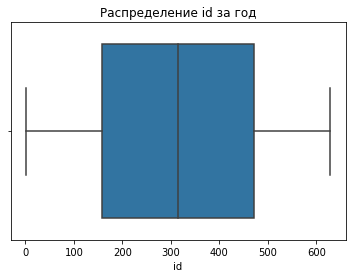

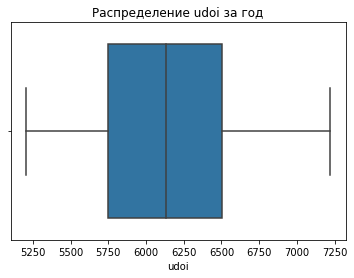

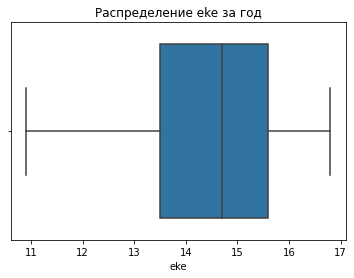

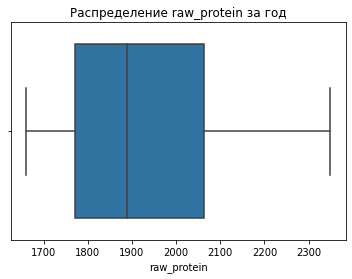

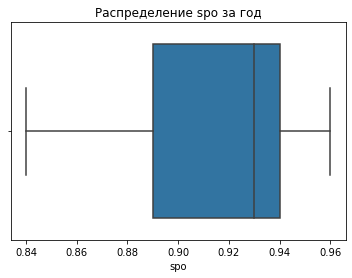

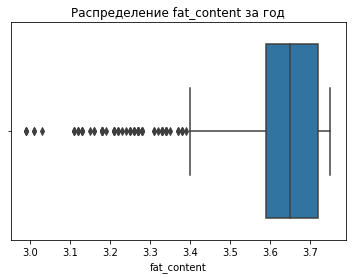

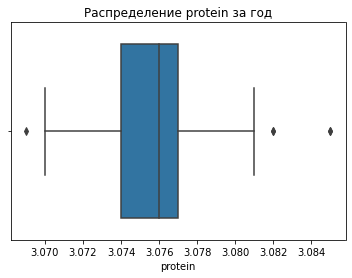

In [19]:
column_quantity = def_column_quantity(df_main2)
for i in column_quantity:
    sns.boxplot(x = df_main2[i])
    plt.title(f"Распределение {i} за год")
    plt.show()

Построив ящики по всем численным данным из датафрейма df_main, можем заметить:
1. Как уже было найдено ранее, выброс в данных по удою в будущем может очень сильно искозить данные, поэтому от него мы избавимся.
2. Данные по жирности молока так же обладают выбросами, но, в отличие от выброса по удою, который, скорее всего является следствием неправильного ввода данных, они лишь информируют о том, что большая часть молока обладает одной жирностью, за исключением некоторых сортов, жирность которых ниже. Эти выбросы мы трогать не будем.
3. Данные по количеству белка в молоке тоже имеют выбросы их природа мне неизвестна. Так как выбросов в данном столбце - единицы, можно рассмотреть их и понять, в чем дело. 

In [20]:
df_main2.query('protein < 3.070')
df_main2.query('protein > 3.081')
#df_main2.sort_values(by = 'protein', ascending = False)

,id,udoi,eke,raw_protein,spo,breed,pasture,father_breed,fat_content,protein,milk_taste,age
77,78,5871,14.7,1795,0.895,Вис Бик Айдиал,Равнинные,Айдиал,3.61,3.082,вкусно,более_2_лет
426,427,6701,15.7,2068,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.72,3.082,вкусно,более_2_лет
471,472,5883,14.9,2159,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.62,3.085,вкусно,более_2_лет
517,518,5819,13.7,1968,0.840,Вис Бик Айдиал,Холмистое,Айдиал,3.15,3.085,вкусно,более_2_лет


Никаких особенностей в данных не было обнаружено. Данные выбросы удалять мы не будем.

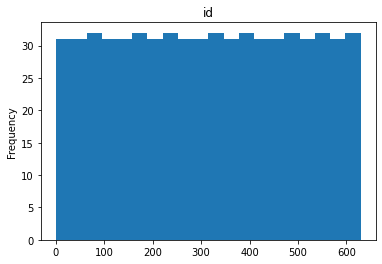

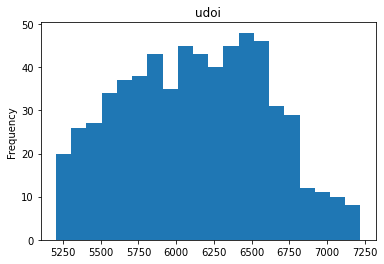

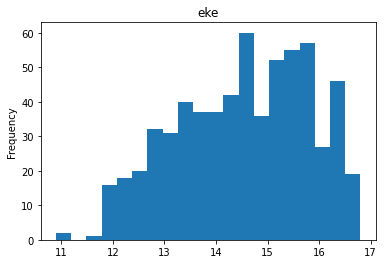

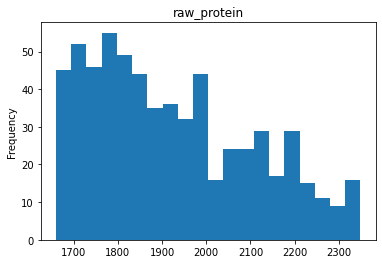

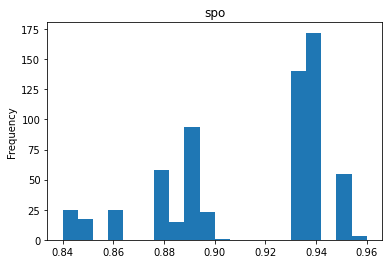

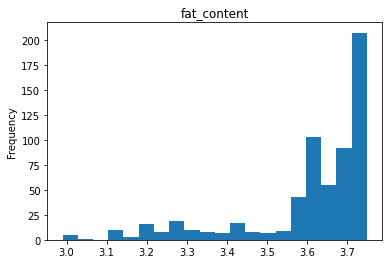

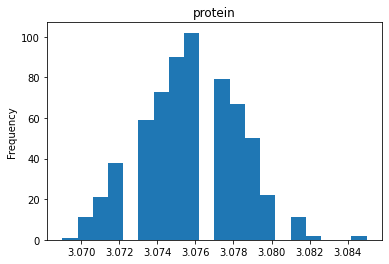

In [21]:
for i in column_quantity:
    df_main2[i].plot(kind = 'hist', bins = 20)
    plt.title(i)
    plt.show()

Среди всех гистограмм нормальным распределением обладает лишь данные по содержанию белка в молоке.

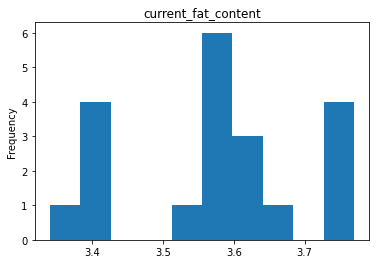

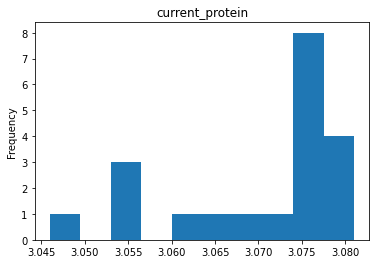

In [22]:
column_quantity = def_column_quantity (df_cow)
for i in column_quantity:
    df_cow[i].plot(kind = 'hist', bins = 10)
    plt.title(i)
    plt.show()

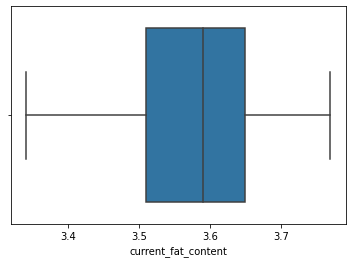

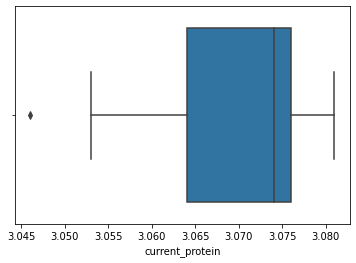

In [23]:
for i in column_quantity:
    sns.boxplot(x = df_cow[i])
    plt.show()


<div class="alert alert-success">
<font size="5">
<b>Комментарий ревьюера</b></font>





Успех:

Верно что для количественных признаков использованы как гистограммы, так и ящика с усами

Отличные графики и оформлены хорошо, плюс за использование seaborn
    

    
    
<div class="alert alert-warning">


Совет 🤔:



- для красоты восприятия рекомендую использовать [subplots](https://nagornyy.me/it/vizualizatsiia-dannykh-v-matplotlib/):  Для каждого признака, в одном столбце график - гистограмма, в другом график - boxplot




- советую написать функцию, смотри сколько однотипного кода.  Ты можешь создать универсальную функцию (к чем и надо стермиться),  которую будешь использовать во всех дальнейших проектах - очень удобно.  Ведь мы во всех проектах  строим графики для категориальных и количественных признаков
    
    
    
- к этому времени уже можно понять что ID ничего информативного не несёт, его можно исключить из анализа. И его график hist . выглядит не очень    

Аналогичная история с данными по содержанию белка в молоке в датафрейме df_cow. Присутствует выброс, но, судя по гистограмме, построенной по этим данным, данный выброс является нормой. Трогать мы его не будем.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍

Ничего необычного в жирности нет


In [24]:
df_main2_pie = df_main2.merge(df_dad)
column_quantity = def_column_quantity(df_main2)
column_quality = def_column_quality(df_main2)
column_quantity.remove('id')

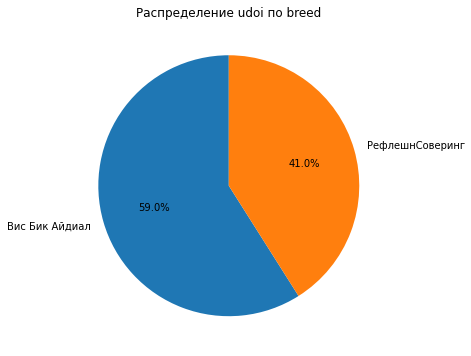

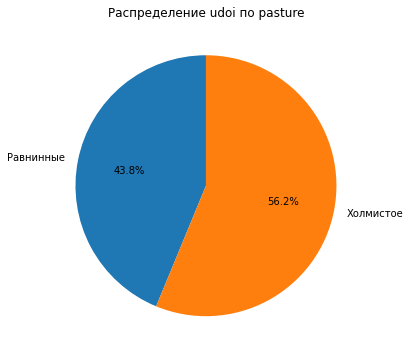

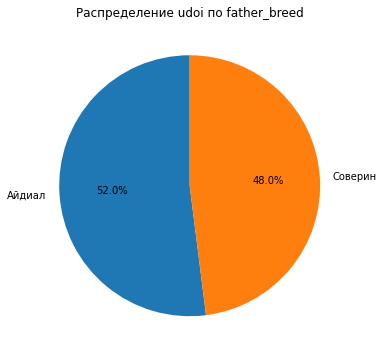

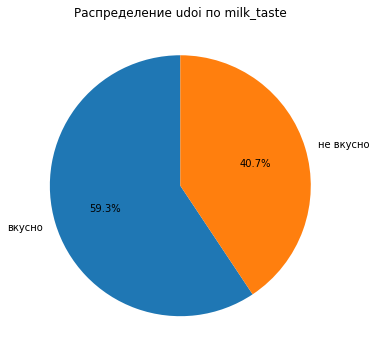

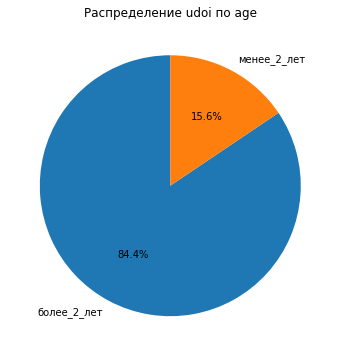

In [25]:
for col in column_quality:
    plt.figure(figsize=(6, 6))
    plt.pie(df_main2_pie.groupby(col)['udoi'].sum(), labels=df_main2[col].unique(), autopct='%1.1f%%', startangle=90)
    plt.title(f'Распределение udoi по {col}')
    plt.show()

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Совет 🤔:



Какое отношение название диаграмм имеет тому что ты построи!? Что значит "распределение удоя по возрасту"?!


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка:



    
-  Что значит "Распределение удоя в зависимости от"?! Нас интересует pie с долей того или иного значения в категориальном признаки  
    
- У нас ведь есть и другие выборки, для них тоже строим графики
    
    
  


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Ошибка ❌:


Вот наша категориальные признаки:

'порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'спо_кат', 'возраст'
    
    
Да них и строй pie    

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Ошибка ❌:





У нас пять категориальных признаков + возраст.  Построй пять графиков. И названиеграфиков  не имеет никакого отношения к тому что построено
    
 

#### Заменил вывод функцией, которая перебирает все количественные признаки по выбранному количественному.

#### Построил. Лично для меня такое количество графиков очень сильно усложняет аналитическую часть работы. Я не могу сконцентрироваться на анализе, если вижу такое количество данных. Поэтому я стараюсь использовать подобного рода функции для вывода.

Все категориальные признаки по удою молока распределены равномерно, имея расхождение +-10%. Это не относится к категории возраста скота: бОльшая часть молока была добыта со скота старше 2-ух лет.

## Корреляционный анализ

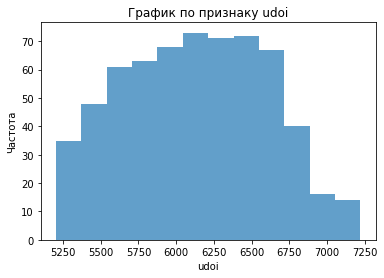

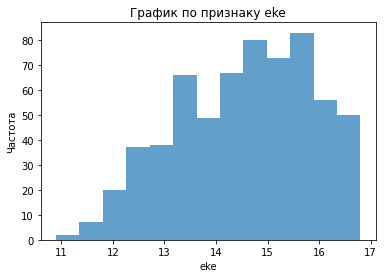

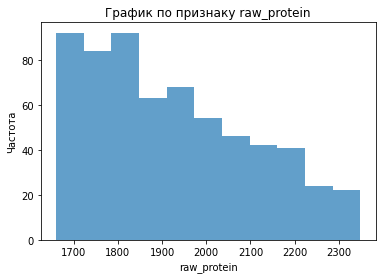

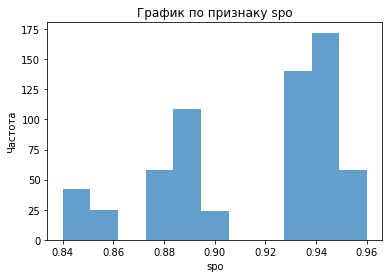

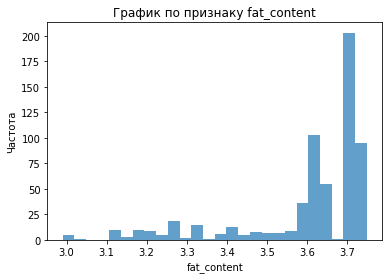

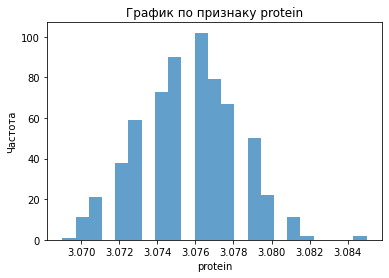

In [26]:
for i in column_quantity:
    plt.hist(df_main2[i], bins='auto', alpha=0.7)
    plt.title(f'График по признаку {i}')
    plt.xlabel(i)
    plt.ylabel('Частота')
    plt.show()

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Гистограмма выше ты уже строил


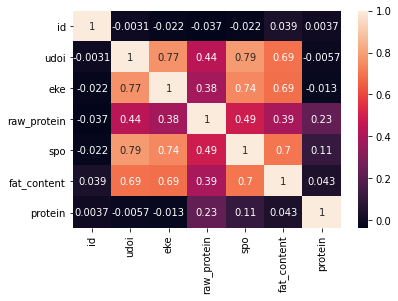

In [27]:
sns.heatmap(df_main2.corr(method='spearman'), annot = True);

Наибольшая корреляция наблюдается между факторами udoi и spo, что справедливо: Удой коровы вплоне вероятно может зависить от типа корма. Наименьшая связь признаков protein и udoi. По поводу данной зависимости мало что можно сказать.

#### Совсем запамятовал за проверку нормальности для корреляции. В данном случае, ни один признак не распределен нормально, в связи с чем, ко всем признакам был применен коэффициент корреляции Спирмена.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Верно 
    




<div class="alert alert-warning">


Совет: 




-  есть такая библиотека [phik](https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7), ее особенности: работа с разными типами данных, в том числе категориальными, учет нелинейных отношений, плюс отличная интерпретация и визуализация. Может быть полезно в будущем
- используя phik_matrix  лучше вручную указать столбцы с количественными признаками через  [interval_cols](https://dzen.ru/a/ZEtcuc4K2RX_Jstr)     
   


- к этому времени я бы уже убрал id, ведь это  номер строки и вряд ли он может быть связан с таргетом (если конечно там нет какой то временной составляющей)

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Ошибка ❌:





мультиколлинеарность (Высокая корреляция между признаками) у нас есть, нет? 
    
    



<div class="alert alert-warning">

Совет 🤔:


Почему мы вообще обращаем на неё внимание?!

- Первый момент: мультиколлинеарность проблема линейных моделей - могут переобучаться
    
    
    
- Второй момент: интерпретируемость линейной модели (мы по коеффициентам судим как признаки влияют на таргет)
    
    
   
Один их способов убрать  мультиколлинеарность это убрать один признак из каждой пары высокореллированных признаков.    


### Мультиколлинеарность отсутствует, исходя из теории практикума (0.9 + корреляция по модулю). Но в других источниках пишут, что превышение коэффициента корреляции от 0.6 уже не сулит ничего хорошего. Но будем работать по теории практикума.


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV4</b></font>



Успех 👍:



Мультиколлинеарности скорее всего нет



<div class="alert alert-warning">

Совет: 


    
 
Но если что всегда можно провести дополнительное исследование с помощью    VIF (Variance Inflation Factor)
    
    


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:


    


    
- перед тем как считать корреляцию Пирcона, нужно было посмотреть как у нас распределены наши количественные признаки. Потому что коэффициент Пирсона мы используем в случае нормальности распределения данных, ведь этот коэффициент чувствителен к отклонениям от нормальности (и к выбросам кстати), что может исказить результаты анализа (в случаи ненормальности используем Спирмена)    

    
    

- нет ничего о наличии или отсутствие мультиколлинеарности (а для каких моделей мультиколлинеарность может быть проблемой и всегда ли?)   
    
    




<div class="alert alert-warning">


Совет: 


- можно поменять политру для удобства восприятия, через добавление cmap='coolwarm' ('bwr', 'seismic'), тогда чем ближе корреляция к 1 тем красней, чем ближе к -1 тем "синей" , ну и чем меньше связи, чем ближе к 0, тем нейтальней цвет. И размер бы увеличить



- Если хочешь убрать AxesSubplot:xlabel..  то ставь в конце `;` или пропиши plt.show()


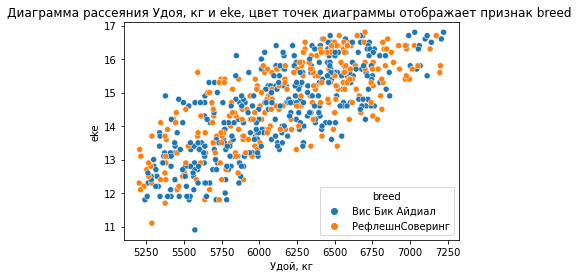

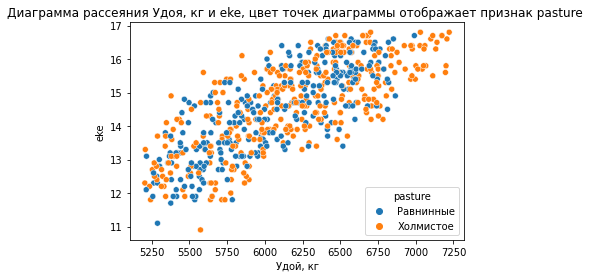

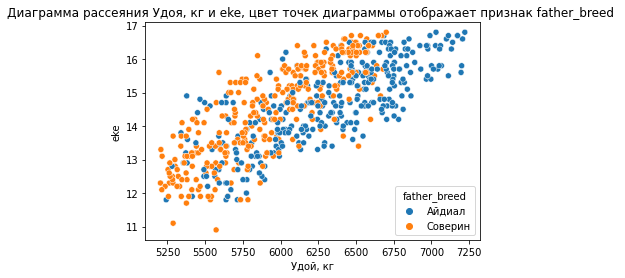

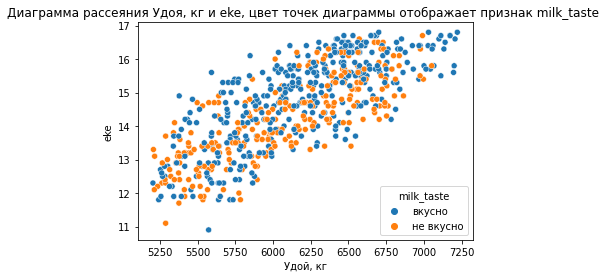

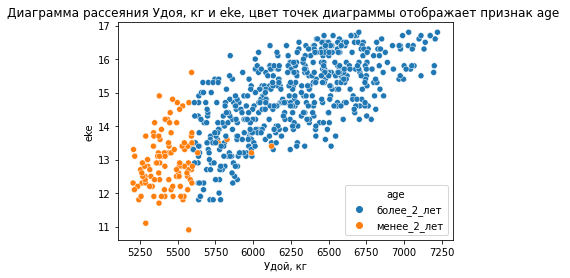

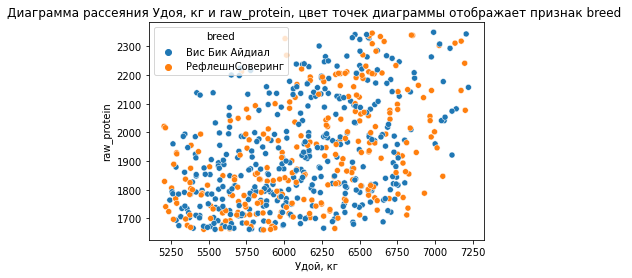

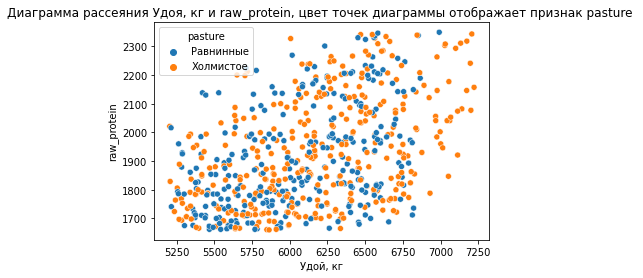

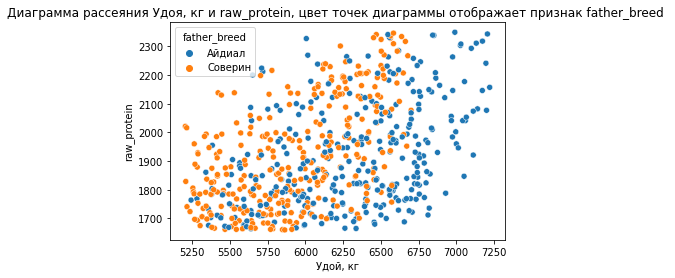

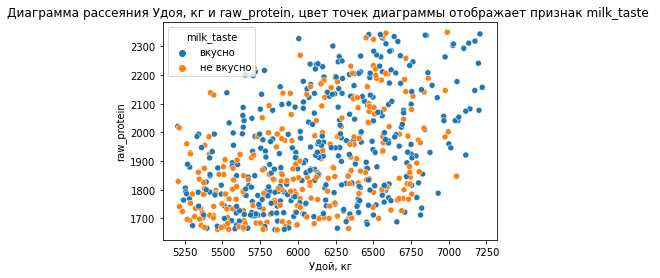

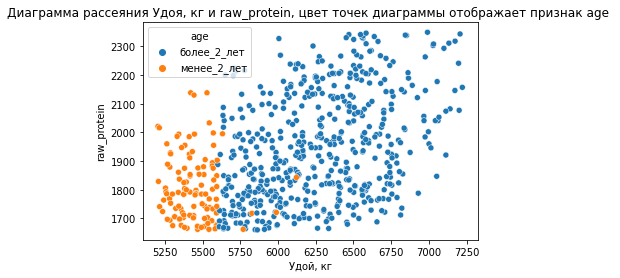

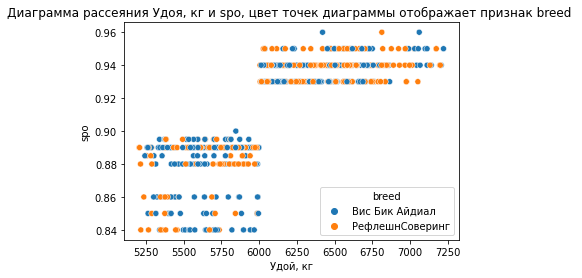

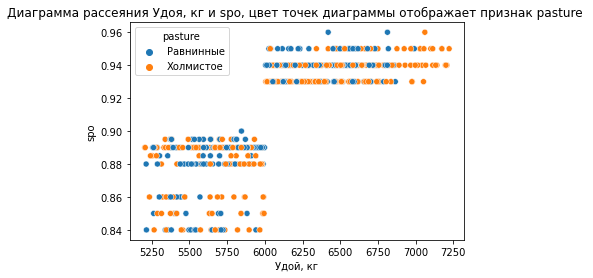

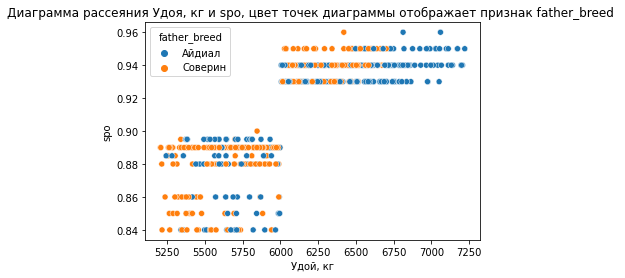

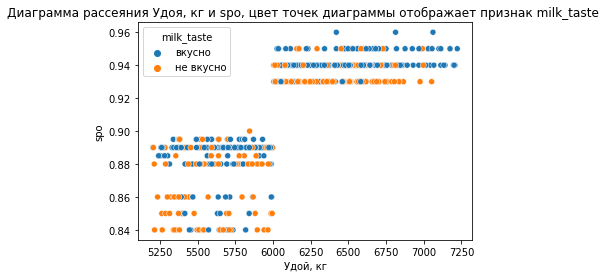

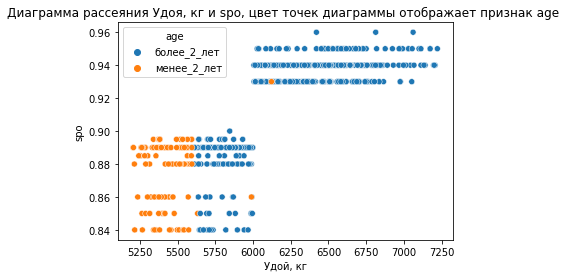

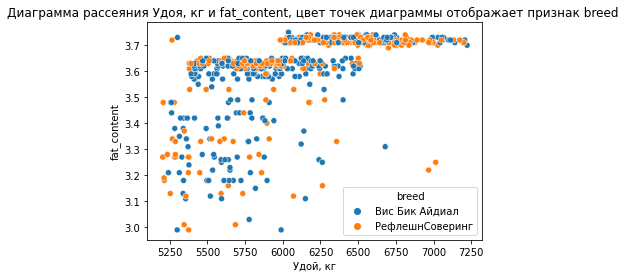

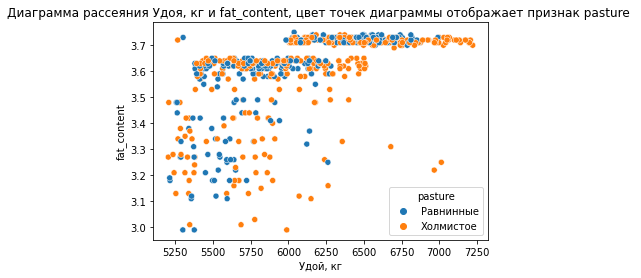

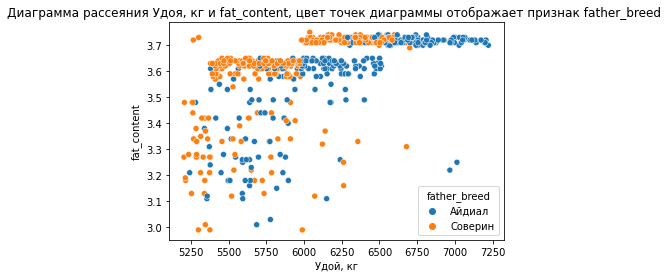

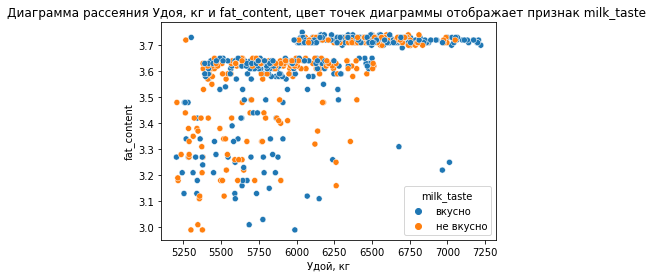

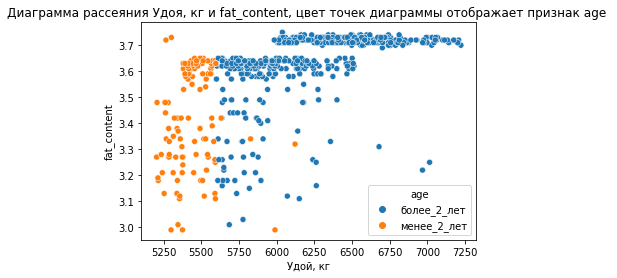

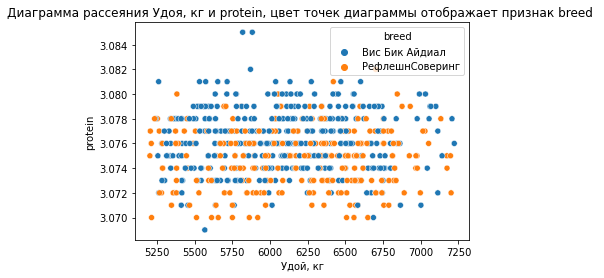

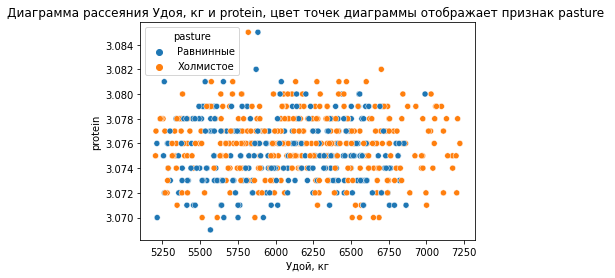

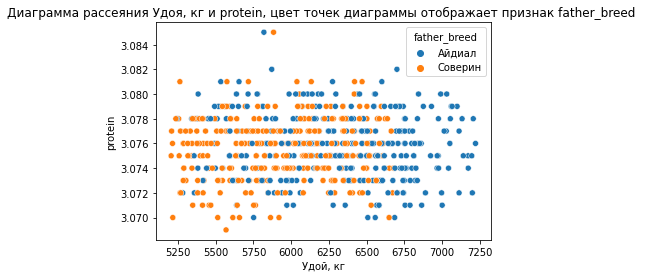

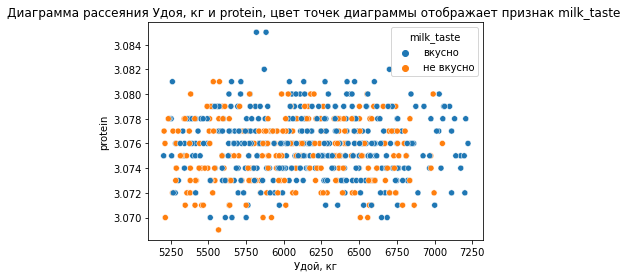

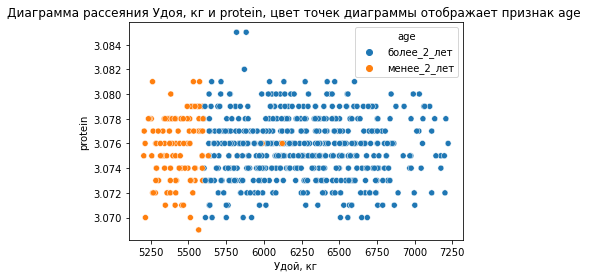

In [28]:
column_scatter = ['eke', 'raw_protein', 'spo', 'fat_content', 'protein']
for i in column_scatter:
    for j in column_quality:
        sns.scatterplot(data = df_main2, x = 'udoi', y = i, hue = j)
        plt.title(f"Диаграмма рассеяния Удоя, кг и {i}, цвет точек диаграммы отображает признак {j} ")
        plt.xlabel('Удой, кг')
        plt.ylabel(i)
        plt.show()

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



-  здорово что построен    scatter plot в разбивке по категориальным признакам 



<div class="alert alert-warning">


Совет: 



- удой лучше на осьY    
    
    
- как можно упростить построение графиков типа scatter?  Можно воспользоваться [sns.PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html).  Он буквально двумя строчками строит scater_plot с разбивкой по категориальным признакам (hue - указываем категориальный признак по которому мы хотим сделать дополнителное разбиение,     facor - список количественных признаков, targ - целевая количественная переменная, cat - Список категориальных признаков)
    
    
            for category in cat:
                g = sns.PairGrid(df, hue = category, x_vars=factor, y_vars=targ)


    


- или строй так же, но подумай о лучшем размещении графиков, сейчас это длинный ряд графиков, который надо прокручивать вниз, почему бы не использовать [subplots](https://nagornyy.me/it/vizualizatsiia-dannykh-v-matplotlib/) и не разместить графики еще и по вертикали в два или три столбца!? Используя histplot (boxplot) и countplot это легко сделать 



Линейная связь между признаками отсутствует. Среди признаков лишь показатель энергетической ценности корма обладает зависимостью. Зависимость нелинейная. Более того, присутствует связь Удоя и fat_content/spo. Природу зависимости точно нельзя описать, но она явно нелинейная. 



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>
    
    
    
Совет: 




- чтобы убедиться что соотношение между удоем и ЭКО в квадрате лучше описывается прямой, можно построить scatter plot для  эке в квадрате и наложить прямую регрессию с вычислением r2 


    
- и почему Линейная связь отсутствует?! Если бы всё так было наша модель показала рандомный прогноз

## Обучение модели линейной регрессии

In [58]:
column_quantity_lin1 = def_column_quantity(df_main2)
column_quality_lin1 = def_column_quality(df_main2)
column_quantity_lin1.remove('id')
column_quantity_lin1.remove('fat_content')
column_quantity_lin1.remove('protein')
column_quantity_lin1.remove('udoi')
column_quality_lin1.remove('milk_taste')
print(f'Категориальные признаки: {column_quality_lin1}')
print(f'Количественные признаки: {column_quantity_lin1}')

Категориальные признаки: ['breed', 'pasture', 'father_breed', 'age']
Количественные признаки: ['eke', 'raw_protein', 'eke_sqr']


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Теперь всё видно, выбор верный

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:




- Стоит вывести какие признаки у тебя посчитались категориальными, какие количественными, а то иначе какой-то чёрный ящик
    
    
- Во-вторых у тебя везде одни и те же   column_quantity и   column_quality, то есть ты их постоянно перезаписываешь.  Это плохая практика, указывай, какой набор признаков к какой модели принадлежит

#### Ок. Буду давать индексы этим переменным и выводить содержимое.

In [30]:
def Linear_function (df, def_quality, def_quantity):
    RANDOM_STATE = 42
    model_lr  = LinearRegression() 
    encoder = OneHotEncoder(drop='first', sparse=False) 
    scaler = StandardScaler()
    y = df['udoi']
    X = df.drop(columns=['udoi'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

    # Количественные признаки
    X_train_scaler = scaler.fit_transform(X_train[def_quantity])
    X_test_scaler = scaler.transform(X_test[def_quantity])

    # Качественные признаки
    X_train_ohe = encoder.fit_transform(X_train[def_quality])
    X_test_ohe = encoder.transform(X_test[def_quality])
    encoder_col_names = encoder.get_feature_names()
    df_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    df_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    # Объединение
    X_train_scaled_ohe = pd.concat([pd.DataFrame(X_train_scaler), df_train_ohe], axis=1)
    X_test_scaled_ohe = pd.concat([pd.DataFrame(X_test_scaler), df_test_ohe], axis=1)

    model_lr.fit(X_train_scaled_ohe, y_train)
    y_pred = model_lr.predict(X_test_scaled_ohe)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"R2 LinearRegression = {r2:.3f}")
    print(f"MAE LinearRegression = {mae:.0f}")
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    print(F"MSE: {mse:.3f}")
    print(F"RMSE: {rmse:.3f}")
    
    error = pd.DataFrame()
    error['y_test'] = y_test
    error['y_pred'] = y_pred
    error['error'] = y_test - y_pred
    sns.scatterplot(data = error, y = error['y_test'], x = error['error'])
    plt.xlabel('Значения тестовой выборки')
    plt.ylabel('Остатки')
    plt.show()
    
    plt.hist(error['error'], bins=20, alpha=0.7)
    plt.title(f'Гистограмма распределения остатков')
    plt.xlabel('Остатки')
    plt.ylabel('Частота')
    plt.show()
    
    interval = st.t.interval(confidence=0.95, df=len(y_pred)-1, loc=np.mean(y_pred), scale=st.sem(y_pred))
    print(interval)

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:



Этой функции явно не хватает
    
    
    return encoder, scaler, model_lr
    
    
    
Первые два пригодятся точно - ведь нам нужно использовать обученные     encoder, scaler когда мы будем делать прогноз на cow_buy


Категориальные признаки: ['breed', 'pasture', 'father_breed', 'age']
Количественные признаки: ['eke', 'raw_protein', 'spo']
R2 LinearRegression = 0.784
MAE LinearRegression = 164
MSE: 43887.015
RMSE: 209.492


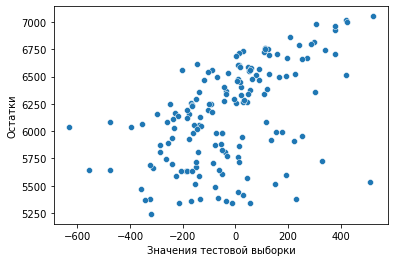

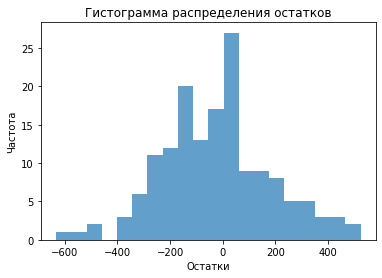

(6105.532899815756, 6228.525774511475)


In [31]:
column_quantity_lin1 = def_column_quantity(df_main2)
column_quality_lin1 = def_column_quality(df_main2)

column_quantity_lin1.remove('id')
column_quantity_lin1.remove('fat_content')
column_quantity_lin1.remove('protein')
column_quantity_lin1.remove('spo')
column_quantity_lin1.remove('udoi')
column_quality_lin1.remove('milk_taste')

print(f'Категориальные признаки: {column_quality_lin1}\nКоличественные признаки: {column_quantity_lin1}')

Linear_function(df_main2, column_quality_lin1, column_quantity_lin1)

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:



    


- когда строишь модель для предсказания удоя молока обрати внимание на данные которые ты используешь в качестве признаков.   Всё-таки считается что в этом проекте не нужно включать в  факторы "жирность" и "белок" (и вкус само собой). Они представляют собой характеристики самого молока, которые мы будем учитывать при анализе его качества. То же самое относится к "вкусу молока" — это критерий качества, который не влияет на удой и должен рассматриваться только в следующей модели. Фокусируйся на факторах, которые могут действительно влиять на количество продуцируемого молока, когда много признаков это не всегда хорошо, а когда они некачественные, линейной модели трудно найти стоящие закономрености
    





<div class="alert alert-warning">


 Совет:

Чтобы сделать код компактнее можно  оформить дополнительную функцию. Как видишь в этом проекте мы не делаем перебора гиперпараметров, и не используем разные модели, так почему бы не создать функцию, которая будет принимать разный набор признаков, а дальше делать одно и то же (сплит, шкалирование + OHE, обучение модели, прогноз модели). Вместо того чтобы три раза писать простыню из кода, мы напишем простыню один раз, а затем три раза применим функцию одной строкой (кстати советую в return кроме модели добавить вывод Scaler и Encoder, ведь они нам понадобятся для того чтобы сделать transform на данных из cow_buy) . В проектах где будет перебор гиперпараметров и мы будем использовать разные модели, в такой функции необходимости не будет, но в этом проекте, я думаю мы здорово улучшим восприятие кода
    
И парочку cоветов по оформлению функций:    
    
- Для таких простых функций острой необходимости нет, код говорит сам за себя, но если хочешь попрактиковаться, можешь включить строку документации [docstring](https://dzen.ru/a/Yw02qy-7BGdhFhN3?utm_referer=yandex.ru).  Можно оставить описание того что делает эта функция, а затем попробовать вызвать что та напишешь с помощью
    
    
    print(my_function.__doc__)
    
или    
    
    help(my_function)


- Код создания функции обычно оставляет под импортами, так их легче контролировать

    



    

#### Я внес корректировки в данные для модели, но ее качество прогноза ухудшилось. При написании проекта я пробовал разные группы признаков, но наилучшая работа модели была при всех учтенных признаках. Закинул модель в функцию.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:



Вообще по поводу жирности и белка это вопрос дискуссионный. Если ты провёл эксперименты, и получила самую высокую метрику при своем наборе признаков, то об этом стоило написать.  И это было бы хорошим основанием делать как ты делать.  Если мы корректно поработали с данными (убрали мультиколлинеарность, провели шкалирование), метрика вполне выступает в качестве критерия правильности выбора того или иного набора признаков



    

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:


    
При анализе остатков не забываем  строить гистограмму остатков  
  
    
в чём смысл анализа гистограмы!? Когда мы используем линейную регрессию мы проводим линию (гиперплоскость) по множеству точек которые видим на scatter_plot.  Конечно нельзя провести прямую линию так чтобы она прошла через все точки и остатков не было, но мы должны стремится провести эту линию так чтобы в среднем эти остатки были равны нулю, если они не равны нулю, то значит есть смещение нашей прямой в какую-то сторону. А на гистограмме остатков это будет отлично видно    
    

#### Гистограмма распределения остатков показывает неравномерное распределение. Это говорит о том, что у модели нестабильная ошибка на всех предсказаниях.

Модель была обучена на всех признаках датафрейма. Метрика R2 говорит о том, что модель в 79% случаев работает корректно. Более того, показатель Средней абсолютной ошибки не достигает и 160 у.е. Иными словами, с виду модель хороша. Но, после построения диаграммы рассения остатков, мы видим некоторую зависимость ошибки от значений тестовой выборки. Зависимость проявляется в промежутке значений 6250-7000. То есть модель чаще всего и сильнее всего ошибается именно на коровах с высоким показателем удоя. 


        

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>


    
    
Совет 🤔:

    
    Метрика R2 говорит о том, что модель в 79% случаев работает корректно

- трактовка r2 не самая очевидная, мне кажется проще всего понять что такое коэффициент детерминации начав рассмотрение парной регрессии (y = ax+b), потому что для нее коэффициент детерминации это квадрат от коеффиента а (он же коеффииент корреляции, он же то то характеризует наклон). Вот тут именно эта логика обьяснения и дана:
https://stat4stud.narod.ru/stat_part2.pdf


        

Лямбда-функция проверяет условие (i > 0.91) и присваивает 1 или 0 в зависимости от результата. Таким образом у нас появился обновленный категориальный бинарный признак.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍lambda




</div>


In [32]:
df_main3 = df_main2
df_main3['eke_sqr'] = df_main3['eke']**2
df_main3['spo'] = df_main3['spo'].apply(lambda i: 1 if i > 0.91 else 0)
df_main3

/tmp/ipykernel_89/2329367351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main3['eke_sqr'] = df_main3['eke']**2
/tmp/ipykernel_89/2329367351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main3['spo'] = df_main3['spo'].apply(lambda i: 1 if i > 0.91 else 0)


,id,udoi,eke,raw_protein,spo,breed,pasture,father_breed,fat_content,protein,milk_taste,age,eke_sqr
0,1,5863,14.2,1743,0,Вис Бик Айдиал,Равнинные,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64
1,2,5529,12.8,2138,0,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84
2,3,5810,14.0,1854,0,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00
3,4,5895,12.4,2012,0,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76
4,5,5302,12.8,1675,0,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,1,РефлешнСоверинг,Равнинные,Айдиал,3.74,3.075,не вкусно,более_2_лет,237.16
625,626,5513,12.9,1700,0,РефлешнСоверинг,Равнинные,Соверин,3.64,3.073,вкусно,менее_2_лет,166.41
626,627,5970,14.4,1837,0,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,207.36
627,628,5746,13.8,1994,0,РефлешнСоверинг,Равнинные,Соверин,3.64,3.077,вкусно,более_2_лет,190.44


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Вот это очень плохая практика
    
    
    df_main3 = df_main2


Если решил так сделать, ты хотя бы стоило сделать копию    
    
    df_main3 = df_main2.copy()
    
    
Понимаешь в чём будет проблема  без .copy() ? 
    
    
И стоило выделить что ты начинаешь вторую модель    

In [33]:
column_quantity_lin2 = column_quantity_lin1
column_quality_lin2 = column_quality_lin1

column_quality_lin2.append('spo')
column_quantity_lin2.remove('spo')
column_quantity_lin2.remove('eke')
column_quantity_lin2.append('eke_sqr')
print(f'Категориальные признаки: {column_quality_lin2}\nКоличественные признаки: {column_quantity_lin2}')


Категориальные признаки: ['breed', 'pasture', 'father_breed', 'age', 'spo']
Количественные признаки: ['raw_protein', 'eke_sqr']


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍




</div>


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


    
    
    
Непонятно почему
    
    .remove('raw_protein')

    
    
А это правильно
    
    
    column_quality.append('spo')
    column_quantity.remove('spo')    
    
    


R2 LinearRegression = 0.818
MAE LinearRegression = 149
MSE: 37030.911
RMSE: 192.434


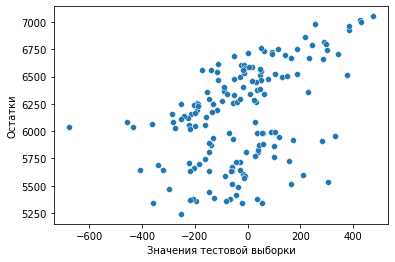

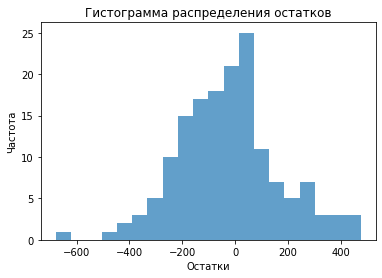

(6102.607546734918, 6229.450151446972)


In [34]:
Linear_function(df_main3, column_quality_lin2, column_quantity_lin2)

После нововведений модель явно начала лучше работать. Теперь ее предсказания верны в 81% случаев, а абсолютная ошибка понизилась до 153. Тем не менее, остатки модели стремяться к  независимости на всём диапазоне использования модели, её разброс стремится к постоянному, значения остатков стали меньше, что свидетельствует об улучшении состояния модели.

In [35]:
df_main4 = df_main3
df_main4 = df_main4.merge(df_dad)

In [36]:
column_quantity_lin3 = column_quantity_lin2
column_quality_lin3 = column_quality_lin2

column_quality_lin3.append('father_name')
print(f'Категориальные признаки: {column_quality_lin3}\nКоличественные признаки: {column_quantity_lin3}')

Категориальные признаки: ['breed', 'pasture', 'father_breed', 'age', 'spo', 'father_name']
Количественные признаки: ['raw_protein', 'eke_sqr']


R2 LinearRegression = 0.825
MAE LinearRegression = 146
MSE: 35673.890
RMSE: 188.875


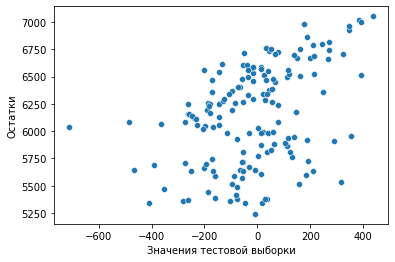

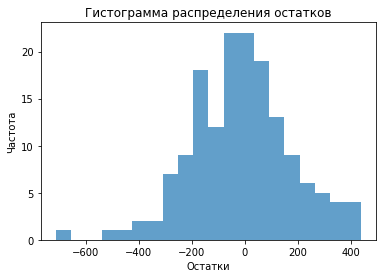

(6091.835660789232, 6221.879485123439)


In [37]:
Linear_function(df_main4, column_quality_lin3, column_quantity_lin3)

Признак "Имя Отца" влияет на итоговый результат работы модели. То есть данный признак нужно использовать для прогноза. 

В целом, данные, судя по результатам работы моделей, были хорошо подготовлены. Наилучшим результатом работы с данными может похвастаться последняя модель, которая собрала в себе все изменения из 1 и 2 моделей. Ее показатель R2 достиг максимального 82%, а предельная абсолютная ошибка - 149. Вторая модель была усовершенствована: данные столбца spo были переведены из количественных в качественные, а данные eke были возведены в квадрат для исключения нелинейности данных. Тем не менее, модель отработала лучше изначальной, где данные были взяты без изменений: R2 повысился с 79 до 81%, а ошибка снизилась с 157 до 151. 3-я модель, главным и единственным изменением которой было добавление нового категориального признака - Имя Отца, показала, как уже было сказано ранее, наилучший результат. Таким образом, мы делаем вывод, что параметр Имя Отца для данного прогноза является весомым признаком. Тем не менее, диаграммы рассеяния моделей говорят об обратном. Диаграмма первой демонстрирует некоторую зависимость ошибки от значений тестовой выборки. Зависимость проявляется в промежутке значений 6250-7000. То есть модель чаще всего и сильнее всего ошибается именно на коровах с высоким показателем удоя. Диаграммы 2-ой и 3-ей модели, относительно первой, обладают меньшей дисперсией, но, все же, нельзя точно сказать, что модель работает некорректно.


    
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:

 

- прекрасно, так мы наглядно увидели как с помощью преобразования признаков, которые нелинейно связан с целевой, мы можем устранить  недостатки линейной модели, подняв метрику. А затем, добавив дополнительный признак - имя отца, поднять качество прогноза ещё выше. До этого была сделана предобработка данных (убраны выбросы + дубликаты, что тоже помогло модели лучше обучиться),  а будь у нас мультиколлинеарность, можно было заняться и ею. Такого рода работа, самая сложная и важная часть в машинном обучении,  мы еще можем поднимать качество прогноза с помощью подбора гиперпараметров и подбора лучшей модели для данного дтасета, но это уже гораздо проще и там нет уже какой то творческой работы 

     

<div class="alert alert-warning">




Совет 🤔:



- Хорошо бы сюда добавить как модель оценивает важность того или иного признака, это может быть отличной иллюстрацией того насколько удачно мы сгенерировали новые признаки. Это можно сделать с помощью [.feature_importance](https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html). А ещё есть такая интересная библиотека shap — позволяет детально изучить работу модели, в том числе оценить важность признаков, при этом не привязана к работе конкретного алгортима прогнозирования. Вот статья с описанием ее работы — https://habr.com/ru/articles/428213/ и детальный разбор графиков - https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137  . Подробнее об этой библиотеке будет следующим проекте



    Диаграммы 2-ой и 3-ей модели, относительно первой, обладают меньшей дисперсией  


Я такого не заметил

   
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:

    
    
- необходимые метрики подсчитаны. Какой-то универсальный метрики нет, поэтому всегда лучше использовать набор. 


- и прекрасно что использовал функцию - теперь во всех последующих проектах где у нам задача регрессии, можем её использовать
    
    
<div class="alert alert-warning">



Совет: 

- вывести вокруг цифры какой то обьясняющий текст, лучше с помощью [f-stings](https://python-scripts.com/f-strings) , тут [свеженькое](https://habr.com/ru/company/wunderfund/blog/674866/) 
    
    
        

В среднем, первая модель ошибается на 203 кг молока, 2-ая на 193 кг и 3-ья модель на 190 кг молока. Эти метрики лишь подтверждают, что наиболее стабильной моделью МО является 3-ая модель. 

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


Хорошо, но не забываем поднимать импорт наверх


С вероятностью 95% доверительный интервал [6107.5321751262945, 6233.6228388876425] содержит истинный средний удой коров. Так как целью построения модели является средний удой за год — не менее 6000 килограммов, следовательно, модель будет корректно отрабатывать по данному запросу.

In [38]:
column = ['eke', 'spo', 'raw_protein']
for i in column:
    df_cow[i] = df_main2[i].mean() * 1.05
df_cow['eke_sqr'] = df_cow['eke'] ** 2
df_cow

,breed,pasture,father_breed,father_name,current_fat_content,current_protein,age,eke,spo,raw_protein,eke_sqr
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,0.618631,2019.947532,233.361138
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,0.618631,2019.947532,233.361138
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,0.618631,2019.947532,233.361138
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,0.618631,2019.947532,233.361138
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,0.618631,2019.947532,233.361138
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,0.618631,2019.947532,233.361138
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,0.618631,2019.947532,233.361138
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,0.618631,2019.947532,233.361138
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,0.618631,2019.947532,233.361138
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,0.618631,2019.947532,233.361138


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Ошибка ❌:




Сначала увеличиваем на 5%, потом возводим в квадрат

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Успех 👍:



Исправлено


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:





eke увеличили на 5%,  а где возведение в квадрат?

#### Потерял.. И уже вернул

Так как клиент указал, что новобранцы в его коровнике будут получать на 5% более питательный корм, но информации по текущему рациону у клиента нет, заполним значения средним по текущему коровнику, увеличив их на 5%. Данные запустим в итоговый датафрейм.

In [39]:
column_quantity_train = column_quantity_lin3
column_quality_train = column_quality_lin3
print(f'Категориальные признаки: {column_quality_lin3}\nКоличественные признаки: {column_quantity_lin3}')

Категориальные признаки: ['breed', 'pasture', 'father_breed', 'age', 'spo', 'father_name']
Количественные признаки: ['raw_protein', 'eke_sqr']


In [40]:
columns_df_main4 = [column for column in df_main4]
df_cow2 = pd.DataFrame()
list = ('raw_protein', 'spo', 'breed', 'pasture', 'father_breed', 'age', 'eke_sqr', 'father_name')
for i in list:
    df_cow2[i] = df_cow[i]

In [41]:
df_cow2['spo'] = df_cow2['spo'].apply(lambda i: 1 if i > 0.91 else 0)


In [42]:
df_cow2['pasture'] = df_cow2['pasture'].replace('равнинное', 'Равнинные')
df_cow2['pasture'] = df_cow2['pasture'].replace('равнинные', 'Равнинные')
df_cow2['pasture'] = df_cow2['pasture'].replace('холмистое', 'Холмистое')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍




</div>


Переменные с количественными и качественными признакми подготовлены. Можно приступать к модели.

In [43]:
RANDOM_STATE = 42
model_lr  = LinearRegression() 
encoder = OneHotEncoder(drop='first', sparse=False) 
scaler = StandardScaler()
y = df_main4['udoi']
X = df_main4.drop(columns=['udoi'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

##Тренировочные данные
# Количественные признаки
X_train_scaler = scaler.fit_transform(X_train[column_quantity_train])
X_test_scaler = scaler.transform(X_test[column_quantity_train])

# Качественные признаки
X_train_ohe = encoder.fit_transform(X_train[column_quality_train])
X_test_ohe = encoder.transform(X_test[column_quality_train])
encoder_col_names = encoder.get_feature_names()
df_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
df_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

# Объединение
X_train_scaled_ohe = pd.concat([pd.DataFrame(X_train_scaler), df_train_ohe], axis=1)
X_test_scaled_ohe = pd.concat([pd.DataFrame(X_test_scaler), df_test_ohe], axis=1)

model_lr.fit(X_train_scaled_ohe, y_train)
y_pred3 = model_lr.predict(X_test_scaled_ohe)

##Реальные данные
# Количественные признаки
cow_scaler = scaler.transform(df_cow2[column_quantity_train])

# Качественные признаки
cow_ohe = encoder.transform(df_cow2[column_quality_train])
encoder_col_names = encoder.get_feature_names()

df_cow_ohe = pd.DataFrame(cow_ohe, columns=encoder_col_names)

# Объединение
df_cow_scaler_ohe = pd.concat([pd.DataFrame(cow_scaler), df_cow_ohe], axis=1)

cow_pred = model_lr.predict(df_cow_scaler_ohe)
df_final = df_cow
df_final['udoi'] = pd.DataFrame(cow_pred)
df_final.head()

,breed,pasture,father_breed,father_name,current_fat_content,current_protein,age,eke,spo,raw_protein,eke_sqr,udoi
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,0.618631,2019.947532,233.361138,6256.139468
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,0.618631,2019.947532,233.361138,6024.931199
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,0.618631,2019.947532,233.361138,5930.219946
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,0.618631,2019.947532,233.361138,6239.309548
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,0.618631,2019.947532,233.361138,6188.366237


In [59]:
st.norm.interval(alpha=0.95, loc=np.mean(df_final['udoi']), scale=st.sem(df_final['udoi']))

/tmp/ipykernel_89/4175160210.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.norm.interval(alpha=0.95, loc=np.mean(df_final['udoi']), scale=st.sem(df_final['udoi']))


(6149.108434587942, 6282.157677934533)

С вероятностью 95% прогнозные значение удоя находятся в интервале 6149 - 6282 кг в год.

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Ошибка ❌:





Отлично,  осталось только почитать доверительный интервал для нашего прогноза. И стоит вывести, показать что получилось, написать вывод


#### Я не знаю, куда пропал блок с подсчетом доверительного интервала и выводом. В 1-ой верси он точно был. Возможно, при редактрировании, я его удалил. 

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV4</b></font>



Совет 🤔:



Тут я извиняюсь, вообще не требовалось посчитать доверительный интервал для cow_buy, достаточно было посчитать по тестовой.  Но хуже не будет





<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:


- По поводу использования Scaler и OHE: fit мы не делаем на cow_buy. fit всегда делаем на тренировочной выборке. И это легко объяснить, ведь по логике моделирования мы владеем информацией только из тренировочной выборки. Поэтому "обучаемся" (fit_transform/fit) на тренировочной, а  затем "распространяем" обученный scaler на test/реальные данные на которых делает прогноз. Во-вторых, мы ведь модель подгоняли под данные в train, а тут можем получить какой то другой масштаб, незнакомый модели. В третьих, train у нас максимальная выборка, значит Scaler и OHE будет наименее подвержена рандому из-за небольшого числа данных 



- Нам нужно чтобы порядок столбцов и названий совпадал у датасета на котором мы делаем fit и датасета на котором делам .transform, иначе может получиться что обучили Scaler/OHE на "сырой протеин", а применим на "эке". Стоит подстраховаться и покзать что ничего не напутали. (Проверь проверь совпадает ли написание "равнинное")



#### Пришлось попотеть с изменением порядка столбцов. Фиты убрал.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:



выглядит громоздко,  ведь ты мог достать обученный encoder и scaler из Linear_function (Кстати в соответствии со стандартом PEP 8, имена функций обычно пишутся в нижнем регистре), используя return

    
    
Во-вторых сколько можно плодить: df_cow, df_cow1, df_cow2,  df_final...  причем ты всё время не используешь copy(), то есть они все перезаписываются
   

## Обучение модели логистической регрессии

In [44]:
df_main4['milk_taste'] = df_main4['milk_taste'].replace({'не вкусно': 0, 'вкусно': 1})
column_quality_log = column_quality_lin3
column_quantity_log = column_quantity_lin3
column_quantity_log.append('udoi')
print(f'Категориальные признаки: {column_quality_log}\nКоличественные признаки: {column_quantity_log}')

Категориальные признаки: ['breed', 'pasture', 'father_breed', 'age', 'spo', 'father_name']
Количественные признаки: ['raw_protein', 'eke_sqr', 'udoi']



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Верно - жирность и белок возвращаем

    
    
<div class="alert alert-warning">


Совет 🤔:


Можно провести мини-исследование влияние признаков для задачи класификации, построив графики  распределений в разбивке по таргету - "вкусность". Выше у нас была задача регрессии поэтому такого рода разбиения мы не использовали, а тут будет очень неплохо глянуть и сделать выводы.  
    

In [45]:
df_main_log = pd.DataFrame()
df_main_log[column_quality_log] = df_main4[column_quality_log]
df_main_log[column_quantity_log] = df_main4[column_quantity_log]
df_main_log['milk_taste'] = df_main4['milk_taste']

In [46]:
df_main_log

,breed,pasture,father_breed,age,spo,father_name,raw_protein,eke_sqr,udoi,milk_taste
0,Вис Бик Айдиал,Равнинные,Айдиал,более_2_лет,0,Буйный,1743,201.64,5863,1
1,Вис Бик Айдиал,Равнинные,Соверин,менее_2_лет,0,Соловчик,2138,163.84,5529,1
2,РефлешнСоверинг,Холмистое,Соверин,более_2_лет,0,Барин,1854,196.00,5810,0
3,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет,0,Буйный,2012,153.76,5895,0
4,Вис Бик Айдиал,Равнинные,Соверин,менее_2_лет,0,Барин,1675,163.84,5302,1
...,...,...,...,...,...,...,...,...,...,...
623,РефлешнСоверинг,Равнинные,Айдиал,более_2_лет,1,Буйный,1964,237.16,6812,0
624,РефлешнСоверинг,Равнинные,Соверин,менее_2_лет,0,Барин,1700,166.41,5513,1
625,РефлешнСоверинг,Холмистое,Соверин,более_2_лет,0,Барин,1837,207.36,5970,0
626,РефлешнСоверинг,Равнинные,Соверин,более_2_лет,0,Барин,1994,190.44,5746,1


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



Опять замечу Что у тебя тут тёмный лес с признаками.  Остаётся только гадать что у тебя в column_quality, что в column_quantity. Что ты туда добавляешь, что-то убираешь. Надо всегда показывать что в итоге 


Преобразование строковых значений в бинарные (0 или 1) целевого признака milk_taste для дальнейшего анализа.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Это правильно


In [47]:
RANDOM_STATE = 42

X = df_main_log.drop(columns=['milk_taste'])
y = df_main_log['milk_taste']

# разбиваем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

scaler = StandardScaler()
encoder = OneHotEncoder(drop='first', sparse=False)

# Количественные признаки
X_train_scaler = scaler.fit_transform(X_train[column_quantity_log])
X_test_scaler = scaler.transform(X_test[column_quantity_log])

# Качественные признаки
X_train_ohe = encoder.fit_transform(X_train[column_quality_log])
X_test_ohe = encoder.transform(X_test[column_quality_log])

encoder_col_names = encoder.get_feature_names()

df_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
df_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

# Объединение
X_train_scaled_ohe = pd.concat([pd.DataFrame(X_train_scaler), df_train_ohe], axis=1)
X_test_scaled_ohe = pd.concat([pd.DataFrame(X_test_scaler), df_test_ohe], axis=1)

# создаём объект для работы с моделью
clf = LogisticRegression()

# обучаем модель на данных
clf = clf.fit(X_train_scaled_ohe, y_train)

# получаем прогнозные метки классов
y_pred = clf.predict(X_test_scaled_ohe)

# проводим оценку точности
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))
print('accuracy: ',round(acc,3))

recall:  0.864
precision:  0.613
accuracy:  0.618



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


    
    
- и для логистической регрессии тоже можно посмотреть как признаки влияют на таргет. Используем также .coef_ , но тут нужно сделать дополнительное преобразование, если хотим посмотреть как изменение признака на единицу повлияет на вероятность отнесения к классу, а не просто смотреть в какую сторону влияет признак на таргет   
    
    

- обрати внимание на аргумент stratify, он позволит сохранить изначальное распределение таргетов во всех новых датасетах.  Существующий дисбаланс никуда не денется, но в каждом датасете он будет одинаковым. [Почитать](https://pythonru.com/baza-znanij/sklearn-train-test-split) можно тут
    


Модель совершает ошибки FP чаще, чем FN, то есть эффективнее избегает ошибок второго типа. Исходя из метрики accuracy, можем сказать, что модель далеко не идеальна и в 36% предсказаний допускает ошибки.


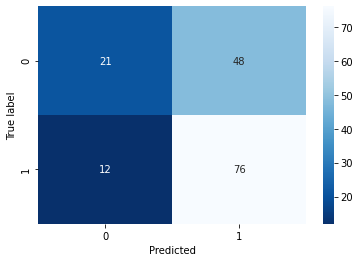

In [48]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

Исходя из матрицы ошибок, можем сделать вывод, что модель в 5 раз чаще дает значение "вкусно" невкусному молоку, чем "невкусным" называет вкусное. Так как наша задача состоит в том, чтобы определять вкусное молоко, то и стремиться нужно к минимизации ошибки первого рода. Далее нам предстоит поработать с порогами разделения на классы.

In [49]:
y_proba = clf.predict_proba(X_test_scaled_ohe)[:, 1]
data = pd.DataFrame(zip(y_test, y_proba),
columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False) 

def cost(y_valid,y_pred_):
    if y_valid < y_pred_:
        return 1
    else:
        return 0

    
thresholds = [round(i,3) for i in np.linspace(0.7,0.9,num = 12,endpoint=False)]

values = []
columns = []
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'] = data['y_proba'].apply(lambda x: 1 if x>= i else 0)
    data['check'] = data.apply(lambda x : cost(x.y_valid,x.y_pred_), 1)
    values.append(data['check'].sum())

costs = pd.DataFrame(zip(columns, values),columns = ['Threshold', 'FP']) 
costs

,Threshold,FP
0,y_pred_0.7,9
1,y_pred_0.717,7
2,y_pred_0.733,5
3,y_pred_0.75,4
4,y_pred_0.767,1
5,y_pred_0.783,1
6,y_pred_0.8,0
7,y_pred_0.817,0
8,y_pred_0.833,0
9,y_pred_0.85,0


recall:  0.136
precision:  1.0
accuracy:  0.516


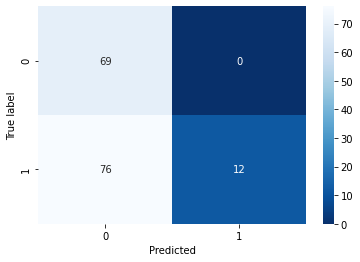

In [50]:
threshold = 0.8
y_pred_custom_threshold = (y_proba > threshold).astype(int)
y_pred_custom_threshold
cm = confusion_matrix(y_test, y_pred_custom_threshold)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

acc = accuracy_score(y_test, y_pred_custom_threshold)
precision = precision_score(y_test, y_pred_custom_threshold)
recall = recall_score(y_test, y_pred_custom_threshold)
print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))
print('accuracy: ',round(acc,3))


Пороговое значение, при котором модель минизирует ошибку первого рода - 0.817. Но, при значении порога 0.8 количество верных предсказаний равно 1. Предпринимательская деятельность - это, во-первых, рискованная деятельность, направленная на регулярное извлечение прибыли. Проанализировав ближайшие пороги к нашему минимуму, я обратил внимание на коэффициент 0.783, при котором модель верно предскажет 14 значений, но присутствует два FP предсказание. Я бы посоветовал воспользоваться такой конфигурацией модели, где ошибка допускается, но профит от допущенной ошибки больше, чем от ее отсутствия. Но. так как заказчик не хочет рисковать вкусом, применим порог 0.8 в прогнозе на реальных данных. Модель ошибается в 50% случаев. 

Исходя из не очень хороших результатов модели, я бы постарался найти больше данных/признаков для более качественного обучения модели. 



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:


    
- найдено верное решение для минимизации риска плохого прогноза (стараемся занулить FP, поднимая presicion)  с помощью манипуляции порогом    
    


    Пороговое значение, при котором модель минизирует ошибку первого рода - 0.8. Но, при значении порога 0.783 количество верных предсказаний равно 2. Предпринимательская деятельность - это, во-первых, рискованная деятельность, направленная на регулярное извлечение прибыли. Проанализировав ближайшие пороги к нашему минимуму, я обратил внимание на коэффициент 0.783, при котором модель верно предскажет 14 значений, но присутствует два FP предсказание.

    
Разумно
    
    
<div class="alert alert-warning">



Совет 🤔:




- вместо перебора по циклу можно было использовать precision_recall_curve, который возвращает три значения: precisions, recalls, thresholds 



- и почему бы не построить красивый график метрик для разных значений threshold





In [51]:
column_quality_final = column_quality_log
column_quantity_final = column_quantity_log
print(f'Категориальные признаки: {column_quality_final}\nКоличественные признаки: {column_quantity_final}')

Категориальные признаки: ['breed', 'pasture', 'father_breed', 'age', 'spo', 'father_name']
Количественные признаки: ['raw_protein', 'eke_sqr', 'udoi']


In [52]:
df_main_final = pd.DataFrame()
df_main_final[column_quality_log] = df_final[column_quality_log]
df_main_final[column_quantity_log] = df_final[column_quantity_log]

In [53]:
df_main_final['spo'] = df_final['spo'].apply(lambda i: 1 if i > 0.91 else 0)


In [54]:
df_main_final['pasture'] = df_main_final['pasture'].replace('равнинное', 'Равнинные')
df_main_final['pasture'] = df_main_final['pasture'].replace('равнинные', 'Равнинные')
df_main_final['pasture'] = df_main_final['pasture'].replace('холмистое', 'Холмистое')

In [55]:
##Реальные данные
# Количественные признаки
final_scaler = scaler.transform(df_main_final[column_quantity_final])

# Качественные признаки
final_ohe = encoder.transform(df_main_final[column_quality_final])
encoder_col_names = encoder.get_feature_names()

df_final_ohe = pd.DataFrame(final_ohe, columns=encoder_col_names)

# Объединение
df_final_scaler_ohe = pd.concat([pd.DataFrame(final_scaler), df_final_ohe], axis=1)

# обучаем модель на данных
final_pred = clf.predict(df_final_scaler_ohe)
y_proba = clf.predict_proba(df_final_scaler_ohe)[:, 1]

df_final['milk_taste'] = pd.DataFrame(y_proba)
df_final['milk_taste'] = df_final['milk_taste'].apply(lambda x: 'вкусно' if x > 0.8 else 'не вкусно')
df_final

,breed,pasture,father_breed,father_name,current_fat_content,current_protein,age,eke,spo,raw_protein,eke_sqr,udoi,milk_taste
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,0.618631,2019.947532,233.361138,6256.139468,вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,0.618631,2019.947532,233.361138,6024.931199,не вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,0.618631,2019.947532,233.361138,5930.219946,не вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,0.618631,2019.947532,233.361138,6239.309548,вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,0.618631,2019.947532,233.361138,6188.366237,не вкусно
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,0.618631,2019.947532,233.361138,6071.600389,не вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,0.618631,2019.947532,233.361138,6256.139468,вкусно
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,0.618631,2019.947532,233.361138,6217.479908,не вкусно
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,0.618631,2019.947532,233.361138,5930.219946,не вкусно
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,0.618631,2019.947532,233.361138,6046.760839,вкусно


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:




та же ошибка с утечкой данных

После использования модели, результаты снова были трансформированы в категориальный признак и добавлены в итоговый датафрейм.

## Итоговые выводы

In [56]:
df_final = df_final.query('udoi >= 6000 & milk_taste == "вкусно"')
df_final

,breed,pasture,father_breed,father_name,current_fat_content,current_protein,age,eke,spo,raw_protein,eke_sqr,udoi,milk_taste
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,0.618631,2019.947532,233.361138,6256.139468,вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,0.618631,2019.947532,233.361138,6239.309548,вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,0.618631,2019.947532,233.361138,6256.139468,вкусно
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,0.618631,2019.947532,233.361138,6046.760839,вкусно
12,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,15.276162,0.618631,2019.947532,233.361138,6256.139468,вкусно
15,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,15.276162,0.618631,2019.947532,233.361138,6239.309548,вкусно


In [57]:
df_final['breed'].count()

6

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:


Рекомендации получены


По итогам проекта прогнозирования ключевых метрик скота, был получен прогноз, согласно которому фермер может приобрести 6 коров из начального пула с минимальным риском для своего хозяйства. Риск потерь минимален так как:

1. Модель предсказания удоя получилась удачной. Ее показатель прогноза равен 82%, а средняя ошибка составляет 190 кг. По итогам прогноза удоя можем заметить, что почти все коровы в год приносят больше целевого показателя+ошибки (6190 кг), следовательно, даже если модель ошиблась, показатель удоя не упадет ниже целевого показателя.

2. Как было указано в ТЗ, мы отбираем коров только с вкусным молоком. То есть модель имела право предсказать вкусное молоко невкусным, но невкусное вкусным - никак. Модель логистической регрессии была менее удачной на старте, но, после изменения порога классификации, удалось практически полностью исключить критичную ошибку - FP. Таким образом заказчик получает прогноз только из 99.99% коров с вкусным молоком.


Есть подозрения, что настолько оптимистичные прогнозы были достигнуты обещанием хозяйства повысить кормовую ценность на 5%. 



В данной задаче были применены 2 модели МО: линейная и логистические регрессии. 

В модели линейной регрессии были поэтапно введены некоторые изменения: была найдена нелинейность признаков spo и udoi. После анализа диаграммы рассеяния данных признаков было замечено, что значения spo визуально разделены при пороговом значении. В связи с чем было принято решение перевести признак spo в категориальный класс; нелинейность была замечена так же между признаки udoi и eke. Для решения данной проблемы был введен новый признак eke_sqr, который является eke, возведенный в квадрат; был введен новый признак: father_name, который улучшил работу модели. 

Для модели логистической регрессии было принято решение об изменении порога принадлежности к классам, исходя из бизнес-запроса. Так как запрос клиента исключал ошибку первого рода, то и значение порога, после анализа, было решено повысить до 0.783. 

Улучшение результатов работы модели, по моему мнению, могли быть достигнуты за счет добавления новых признаков. Для удоя это может быть, допустим, масса коровы. 

Кроме того, модель могла бы работать лучше, если бы начальные данные имели бОльшую зависимость между собой. При построении диаграммы рассеяния мы видели, что большинство признаков вообще никак не коррелирует с целевым признаком, следовательно, погрешность модели с такими данными только увеличивается.

В плане метрик, данный проект основывался на метриках MAE, MSE, MRSE для модели классификации и Accuracy, Precision, Recall для модели логистической регрессии.

Точность (Accuracy): Показывает общую долю правильных предсказаний. 

Точность положительного класса (Precision): Показывает долю верно предсказанных положительных случаев относительно всех предсказанных положительных случаев. Это важно, если ложноположительные срабатывания дорого стоят. В нашем кейсе как раз ложноположительные (FP) являются критическими ошибками, следовательно, данная метрика должна стремиться к нулю при работе модели.

Полнота (Recall): Показывает долю верно предсказанных положительных случаев относительно всех реальных положительных случаев. Это важно, если упущенные положительные случаи имеют высокую стоимость.



<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>


Никита, у тебя старательно выполненная работа, все четко, осмысленно. Выводы присутствуют, графики оформлены аккуратно, код подробно прокомментирован. Проект конечно очень непростой с точки зрения обьема.  Теперь первый проект касающийся непосредственно машинного обучения стал гораздо насыщенней, теперь как раньше мы не ограничиваемся перебором лучших гиперпараметров, а можем увидеть как работать с признаками (что на самом деле и составляет большую часть работы дата-сантиста) и как с помощью этого мы можем нивелировать те или иные недостатки той или иной модели и добиться лучшего результата

    

    
Спасибо за работу, но в настоящее время я не могу принять проект, поэтому пообщаемся ещё )



    
    

Я оставил небольшие советы и вопросики (если есть время и желание можешь воспользоваться/ответить)
    
В частности: 

- я бы тебе посоветовал поработать над более  симпатичным представлением графиков с помощью subplots

- проект довольно большой, с постоянно повторяющимся кодом, так и запутаться недолго. Так что тут ты можно поразмыслить над архитектурой, и написать функции которые позволят сделать проект читабельней: это и в части графиков, и подсчета метрик, и процесса моделирования. Конкретные советы я оставил

- ты везде даёшь одни те названия выборкам, во-первых они не информативны, во-вторых они постоянно перезаписываются. Стоит поработать над читабельностью проекта. Не стесняйся выводить на печать нужную инфу,  не стесняйся давать  информативные названия своим выбором    

    
    
Обязательное к исправлению:






- не указан  decimal, а данные стоит сразу привести  к коректному виду

    
    
    
- есть замечания к графикам    


    
    
- нет проверки на мультиколлинеарность

    
    
    
- не забываем что Пирсона используем только если количественный признак распределён нормально

    
    


    
- нелогично использовать жирность и белок для прогноза у удоя, и выводим на печать  списки признаков
    
    
  
- не нашел возведение эке в квадрат для cow_buy    
    
    

- при шкалировании и кодировании  на train делаем .fit, на test/valid/реальных данных .transform

    
    
    
- при анализе остатков не забываем гистограмму строить
    
    
    
Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 
    


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу!    

    

Что осталось из красного:


    
- строим графики для категориальных признаков    
    
    
- нет проверки на мультиколлинеарность   
    
    
- сначала увеличиваем эке на 5%, потом возводим в квадрат    


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV3</b></font>

Спасибо за работу!    

    

Что осталось из красного:


    
- есть замечание к графику для категориальных признаков   
    
    
- нет проверки на мультиколлинеарность   
    
    
- считаем доверительный интервал для прогноза на тест 


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV4</b></font>

Спасибо за работу Никита!  Всё-таки обратим внимание на надписи которые ты даёшь для графиков. Стоит написать что-то вроде "Доля в разбивке по типу пастбища", " Доли коров по породе отца"...   


А в остальном отличная работа. Желаю успехов в дальнейшей учебе!

